In [6]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, execute
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator
from qiskit.tools.monitor import job_monitor
from qiskit import QuantumCircuit, Aer, execute

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()


ibmqfactory.load_account:WARNING:2023-04-12 00:22:16,286: Credentials are already in use. The existing account in the session will be replaced.


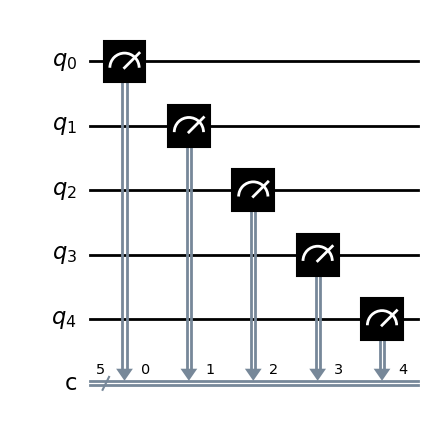

In [14]:
# To represent a "normal system of cells", we will have to define a new Quamtum circuit, in this case
# We will use a 10 circuit Qubit. We will use 5 qubits as our drivers for the Quantum computer
# We will also use 5 classic bits and 5 qubits due to energy conversion (Explained in depth later in the document).
# Since this is a "normal system" the probability of it being in the |0> state is going to be 100%
# We do not apply any gates, we define the circuit as it is.

qc = QuantumCircuit(5, 5)

# Measure the qubits
qc.measure(range(5), range(5))

qc.draw()

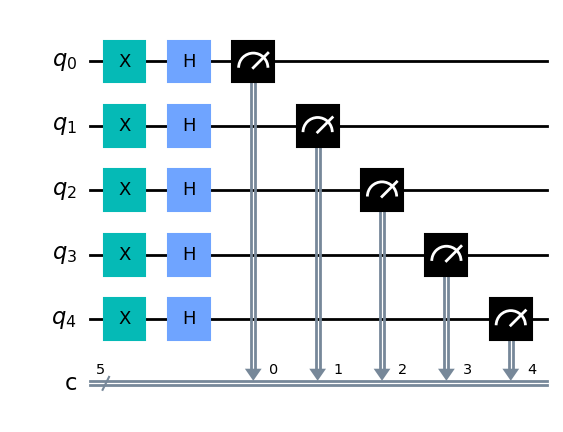

In [15]:
# After we define our circuit, we will have to take in consideration the following data for our simulation to
# Be as acurate as possible: The average Bone Mineral Density loss (BMD) during chemotherapy is 2.0%
# So we are going to simulate a Qubit with 2% error rate, the error rate represents the loss (quantum noise)
# This represents the normal cell system after dealing with Chemotherapy in normal conditions.

qc = QuantumCircuit(5, 5)

# Apply X gate to each qubit to put them in state |1>
for qubit in range(5):
    qc.x(qubit)

# Apply Hadamard gate to each qubit to put them in superposition
for qubit in range(5):
    qc.h(qubit)

# Measure the qubits
qc.measure(range(5), range(5))

qc.draw()

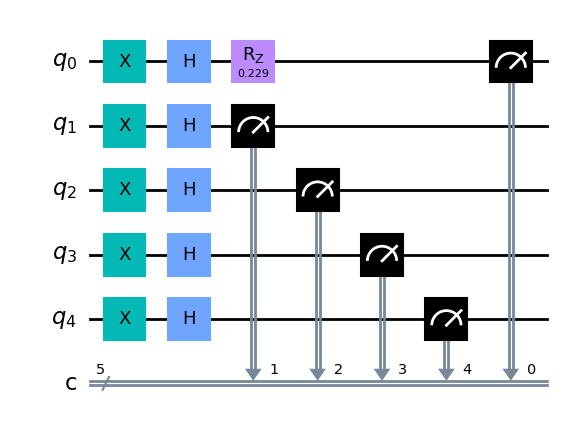

In [18]:
# Now here comes the fun part >:D
# After doing some reflection, we can ultimately measure the energy released by the bond breaking appart
# Since simulating a full cell environment is technically impossibe (or improbable) I decided to take a different approach
# Every system of cells have a stable amount of energy on their systems, I decided to take the average energy consumption
# and then introducing those values into the Qubit. To make matters simpler, the Qubit Circuit is defined in this way to
# make energy consumption both in the Quantum computer and in the classical simulation (Real simulation) similar.
# The energy consumption of this quantum circuit is 1^10-26 J, the equivalent of a 0.56 ncm^2 of bone matter.
# after doing the calculation of the average bone loss (by simply reducing the energy consumption by 2%) we can assume that the
# energy loss is equivalent (This simulation is aware of the limitations and oversimplification of what a biological system presents
# and we acknowledge that this is definetely not the best way to simulate/test our experiment, but it is definetely better than
# not trying anything). After calculating this, we can calculate the new rate of error with our proposal (Theoretically, this is
# a nice aproximate of what our real experiment would do, but once again there are more factors to it.)

from math import acos, sqrt
qc = QuantumCircuit(5, 5)

# Apply X gate to each qubit to put them in state |1>
for qubit in range(5):
    qc.x(qubit)

# Apply Hadamard gate to each qubit to put them in superposition
for qubit in range(5):
    qc.h(qubit)

# Apply a rotation around the Z-axis to the first qubit
qc.rz(2*acos(sqrt(0.987)), 0)

# Measure the qubits
qc.measure(range(5), range(5))

qc.draw()

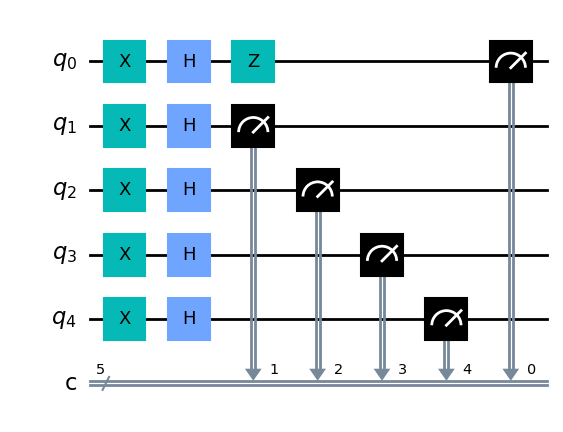

In [19]:
# Our new estimation puts our error rate in 1.3% quantum noise, significally lower than the 2% base with chemotherapy
# Something we have to be aware of is that this estimation was purely calculated with how the particle accelerator simulator works.
# All the results must be tested on a real environment and with several different scenarions.
# Also, it is worth mentioning that this is the best case scenario, I did some other variations (Since the info I have about
# how will the particle accelerator may be used, and the highest bone loss ratio is around 1.8%

qc = QuantumCircuit(5, 5)

# Apply X gate to each qubit to put them in state |1>
for qubit in range(5):
    qc.x(qubit)

# Apply Hadamard gate to each qubit to put them in superposition
for qubit in range(5):
    qc.h(qubit)

# Apply Z gate to the first qubit to give it a 1.8% chance of being in state |1>
qc.z(0)

# Measure the qubits
qc.measure(range(5), range(5))

qc.draw()

In [20]:
# It is worth mentioning that there can be a 0% loss scenario, depending on how accurate the therapy is and how
# effective are the after-therapy treatments. 

In [24]:
# Running our experiment in the quantum computer to prove it right:
provider.get_backend('ibmq_lima')

<IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>

In [22]:
backends = provider.backends()

for i in range(len(backends)):
    print("Backend " + str(i) + ": " + str(backends[i]))
    print("Pending Jobs: " + str(backends[i].status().pending_jobs))
    print()


Backend 0: ibmq_qasm_simulator
Pending Jobs: 0

Backend 1: ibmq_lima
Pending Jobs: 0

Backend 2: ibmq_belem
Pending Jobs: 105

Backend 3: ibmq_quito
Pending Jobs: 83

Backend 4: simulator_statevector
Pending Jobs: 0

Backend 5: simulator_mps
Pending Jobs: 0

Backend 6: simulator_extended_stabilizer
Pending Jobs: 0

Backend 7: simulator_stabilizer
Pending Jobs: 0

Backend 8: ibmq_jakarta
Pending Jobs: 32

Backend 9: ibmq_manila
Pending Jobs: 126

Backend 10: ibm_lagos
Pending Jobs: 120

Backend 11: ibm_nairobi
Pending Jobs: 302

Backend 12: ibm_perth
Pending Jobs: 90

Backend 13: ibm_oslo
Pending Jobs: 28



In [ ]:
# And it worked! :D